In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv("/content/fact_transport.csv")
df1=pd.read_csv("/content/dim_districts.csv")
df3=pd.read_csv("/content/dim_date.csv")

In [3]:
print(df.head(3))

  dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0      15_1  2019-04-01             17910              3011   
1      18_2  2019-04-01              3066               306   
2      20_3  2019-04-01              1577               215   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                    142                         49                        64   
2                     79                         29                        21   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
0                 1278                16110                 4182   
1            

In [5]:
df['month'] = pd.to_datetime(df['month'])

In [12]:
df['total_vehicle_sales'] = df.iloc[:, 2:].sum(axis=1)

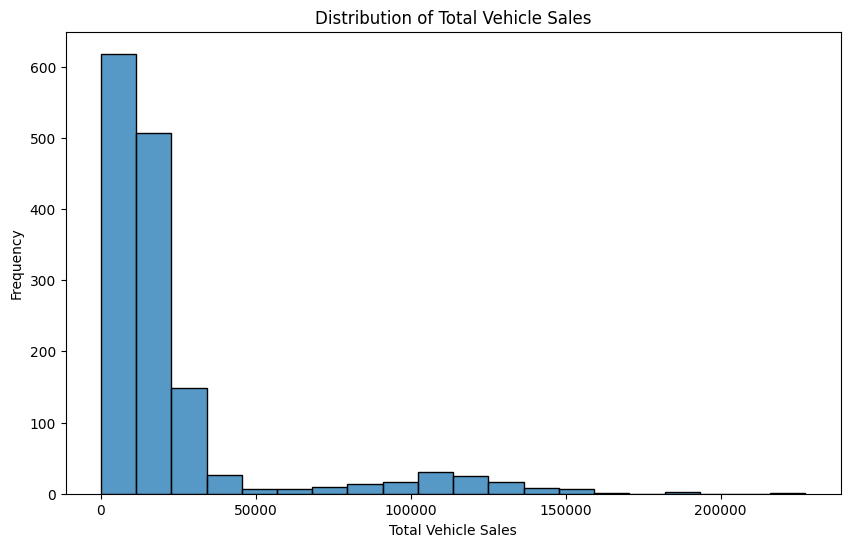

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_vehicle_sales', bins=20)
plt.title('Distribution of Total Vehicle Sales')
plt.xlabel('Total Vehicle Sales')
plt.ylabel('Frequency')
plt.show()

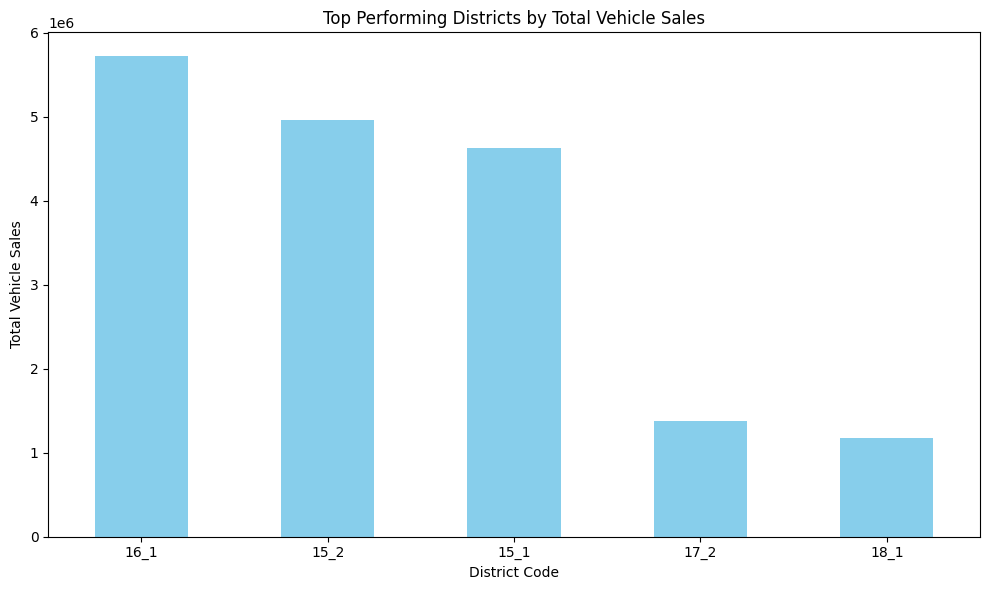

In [17]:
# Calculate the total vehicle sales for each district
district_total_sales = df.groupby('dist_code')['total_vehicle_sales'].sum()

# Get the top 5 districts with the highest total vehicle sales
top_districts = district_total_sales.nlargest(5)

# Plot a bar chart of top performing districts
plt.figure(figsize=(10, 6))
top_districts.plot(kind='bar', color='skyblue')
plt.title('Top Performing Districts by Total Vehicle Sales')
plt.xlabel('District Code')
plt.ylabel('Total Vehicle Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

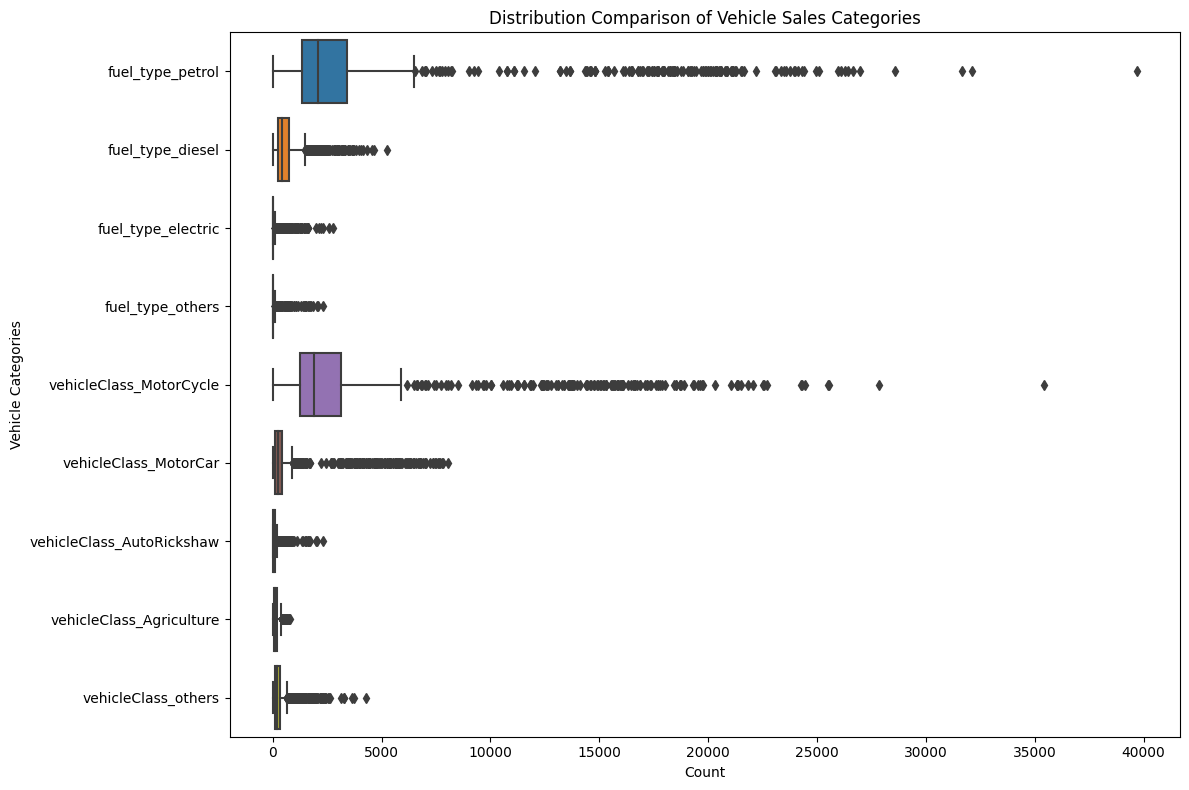

In [18]:
vehicle_sales_columns = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others', 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[vehicle_sales_columns], orient='h')
plt.title('Distribution Comparison of Vehicle Sales Categories')
plt.xlabel('Count')
plt.ylabel('Vehicle Categories')
plt.tight_layout()
plt.show()

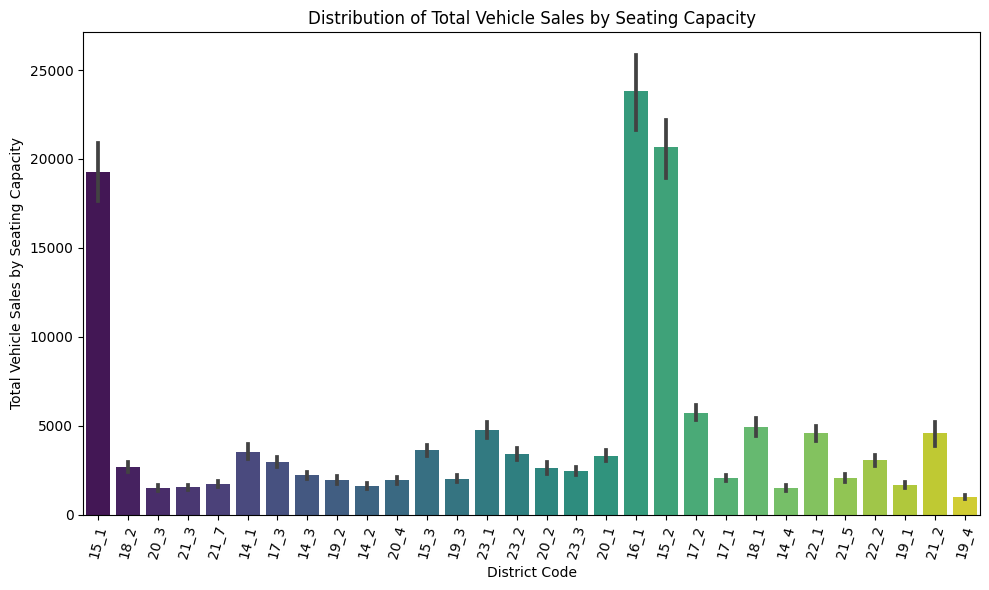

In [20]:
seating_capacity_columns = ['seatCapacity_1_to_3', 'seatCapacity_4_to_6', 'seatCapacity_above_6']
df['total_vehicle_sales_by_seating_capacity'] = df[seating_capacity_columns].sum(axis=1)

# Plot a bar chart to visualize the distribution of total vehicle sales by seating capacity
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['dist_code'], y='total_vehicle_sales_by_seating_capacity', palette='viridis')
plt.title('Distribution of Total Vehicle Sales by Seating Capacity')
plt.xlabel('District Code')
plt.ylabel('Total Vehicle Sales by Seating Capacity')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Question 5

<ipython-input-46-e92143cf1fac>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_vehicle_sales = fuel_type_data.groupby(['district', 'Mmm']).mean().reset_index()


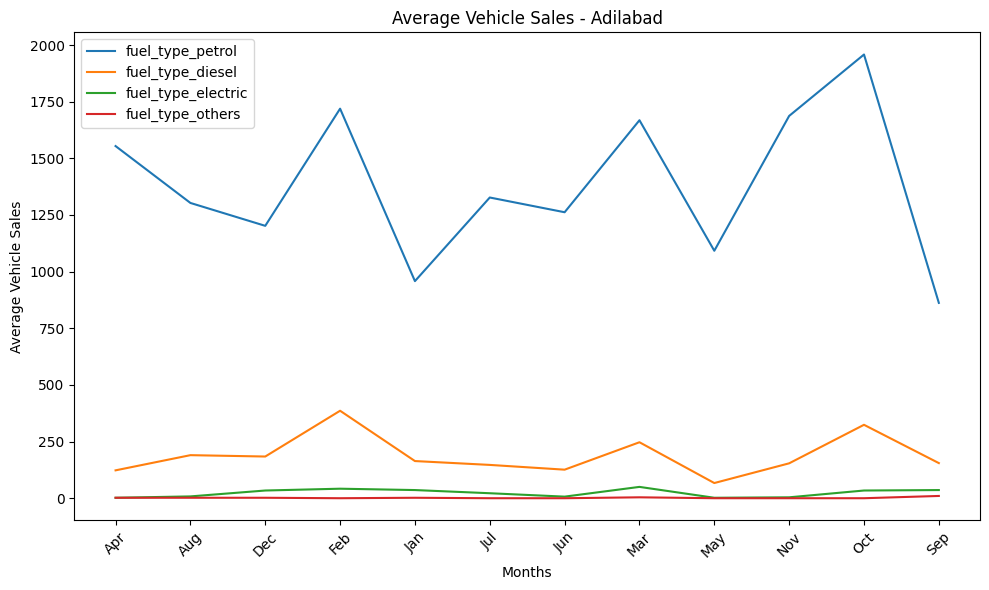

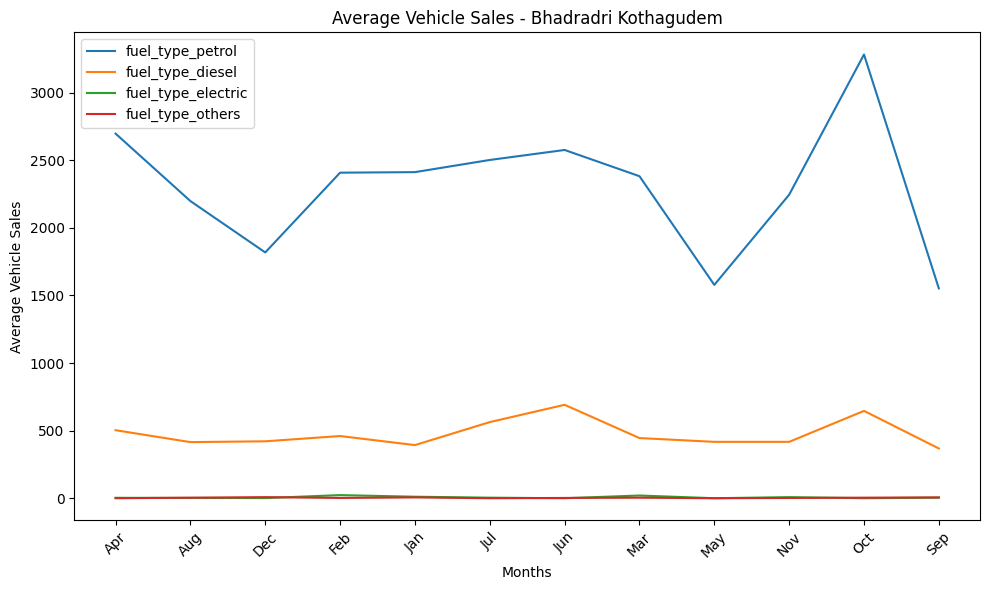

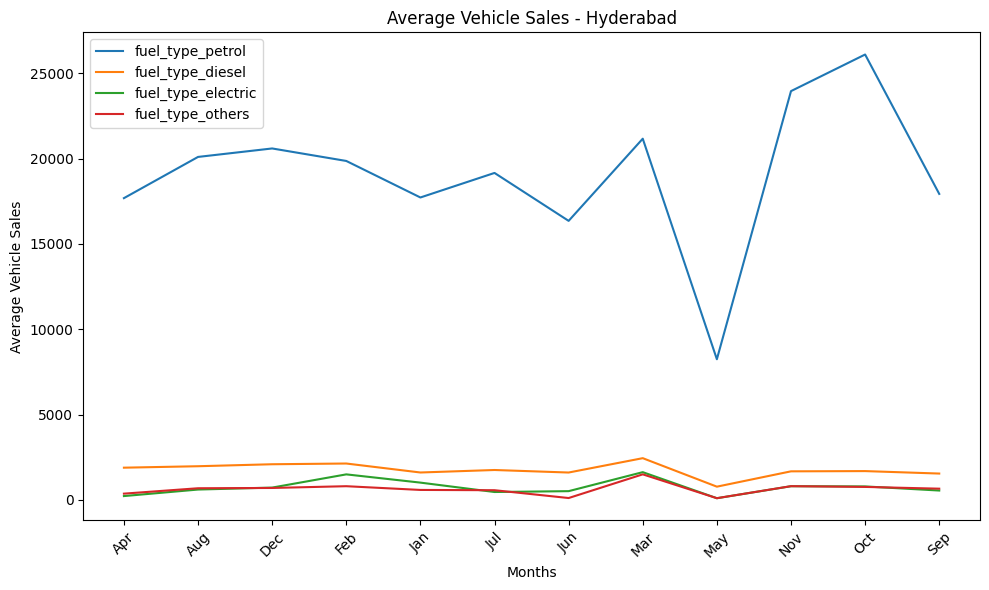

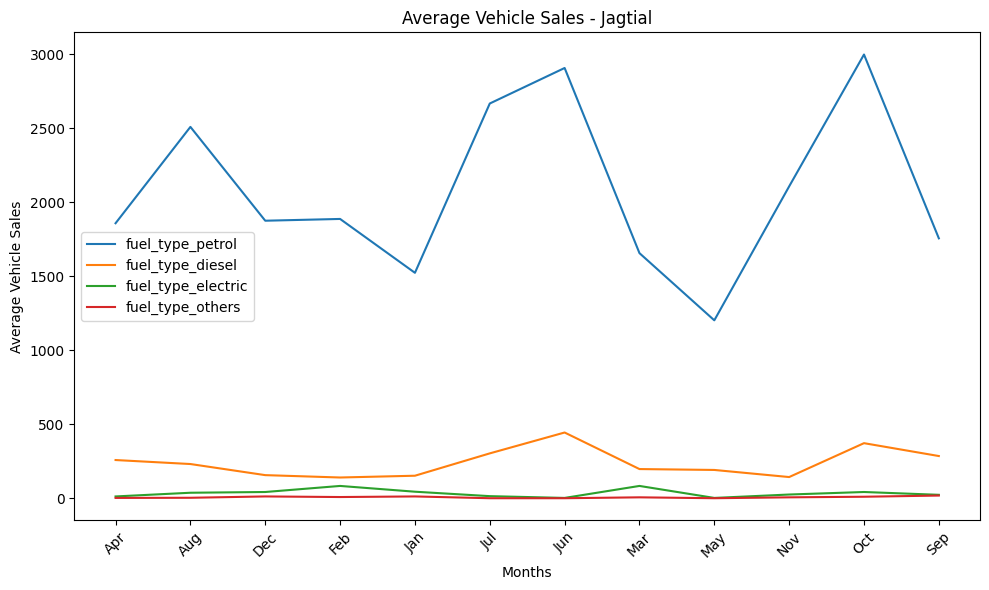

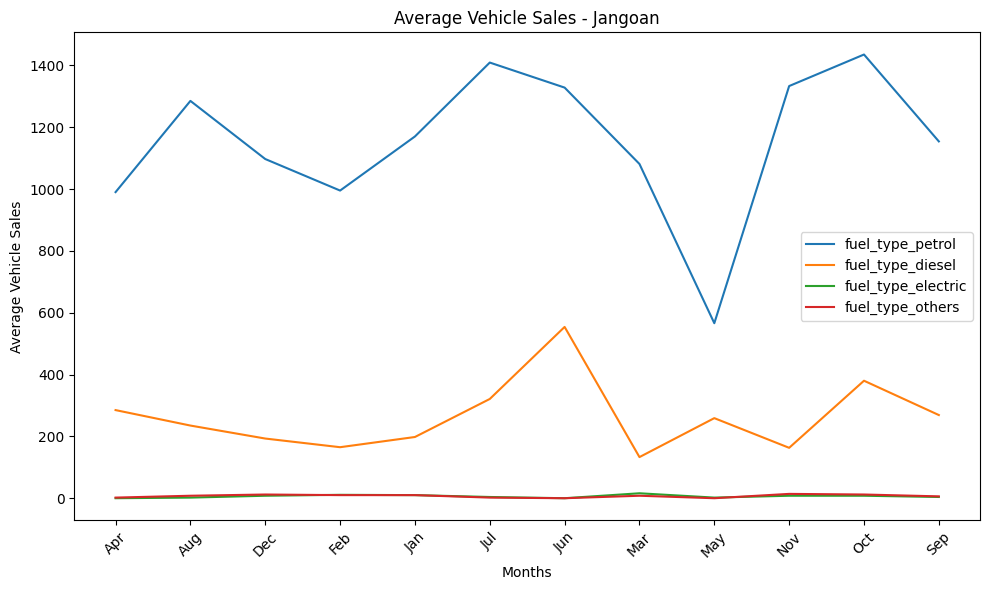

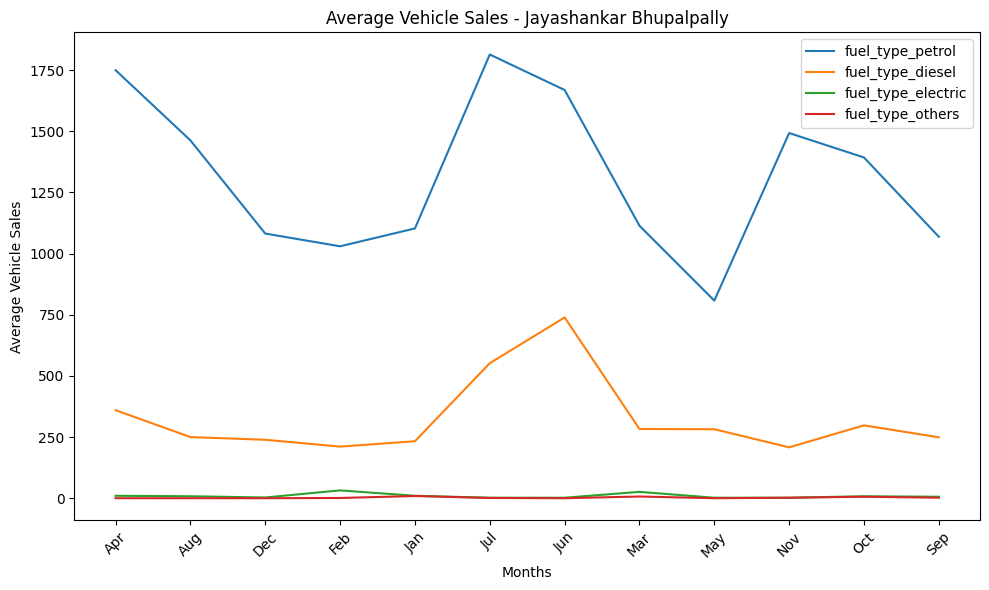

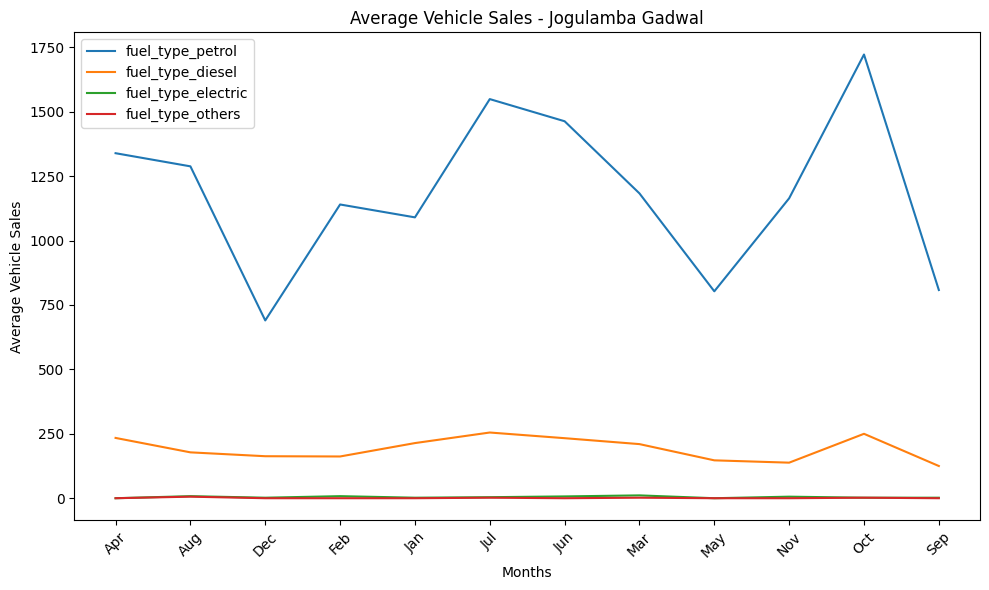

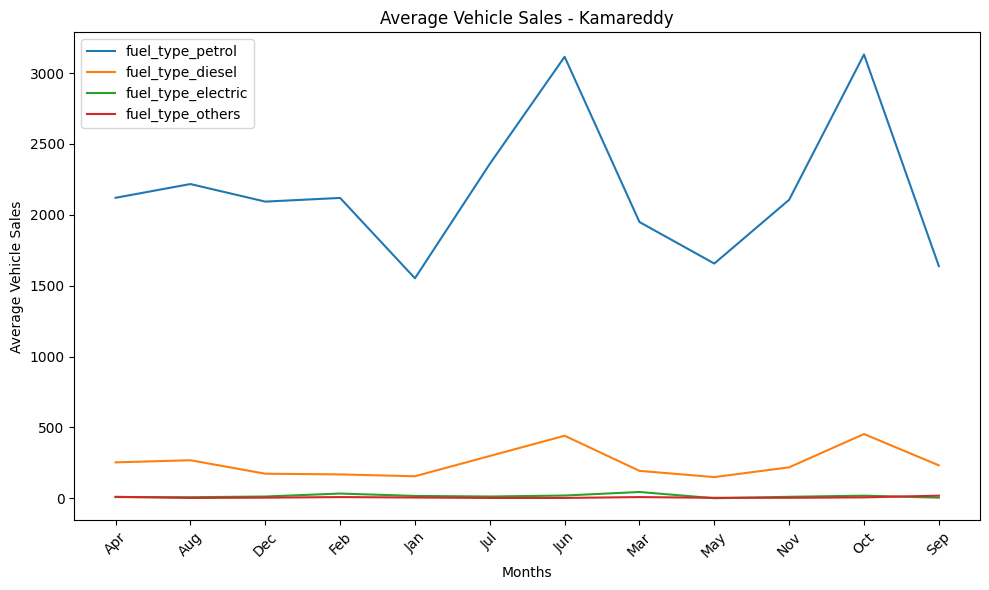

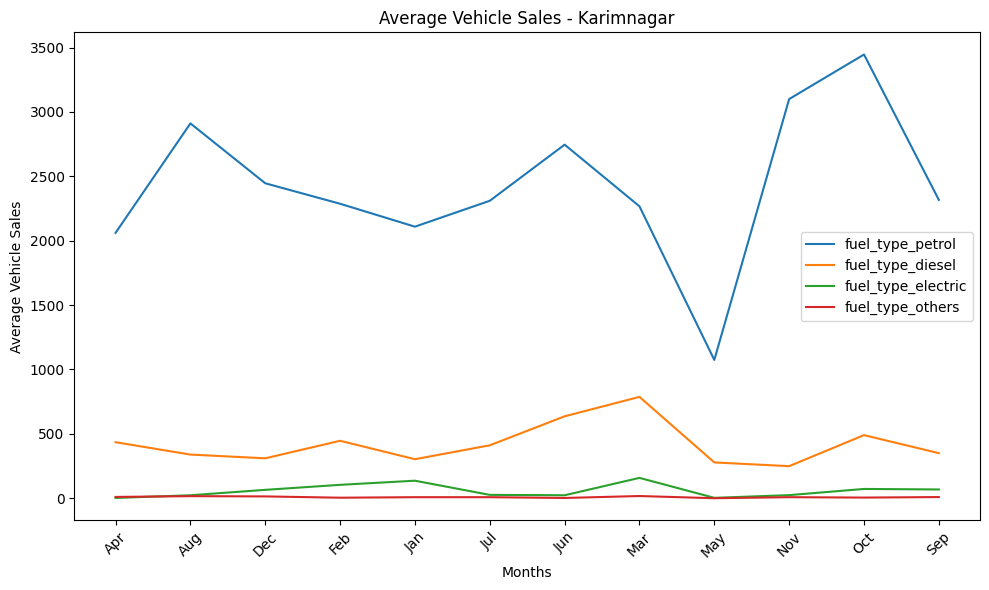

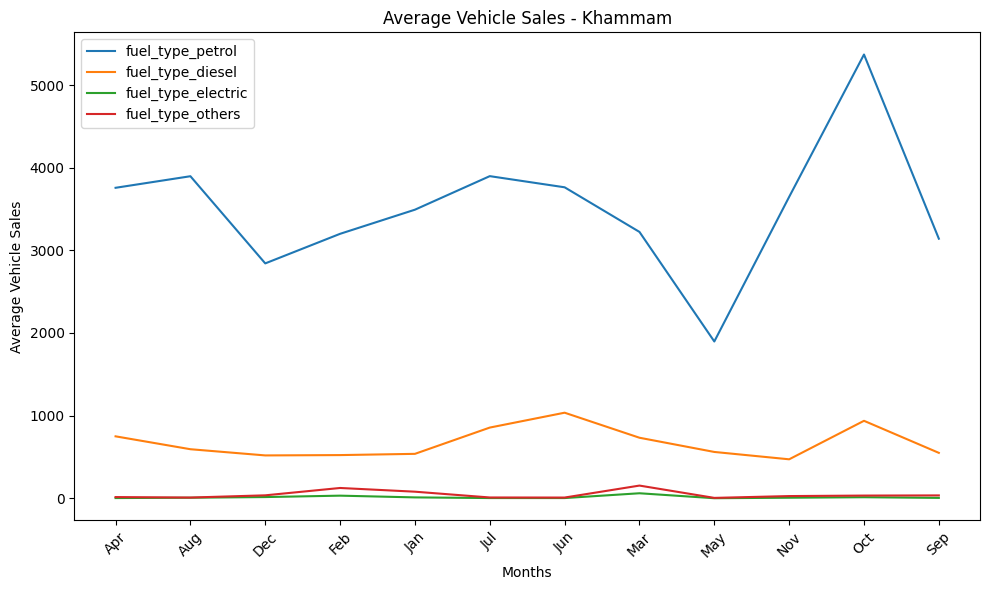

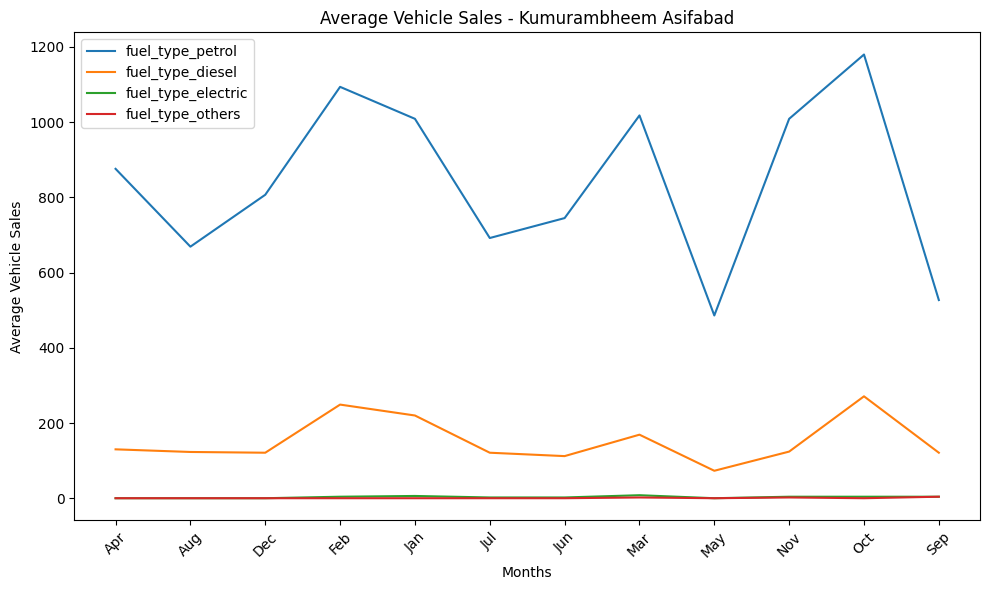

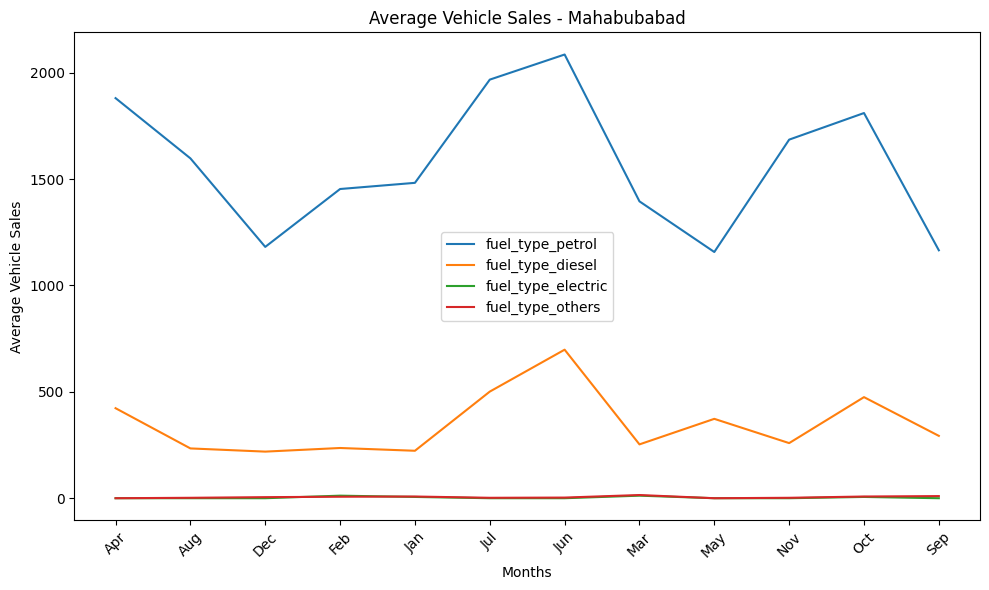

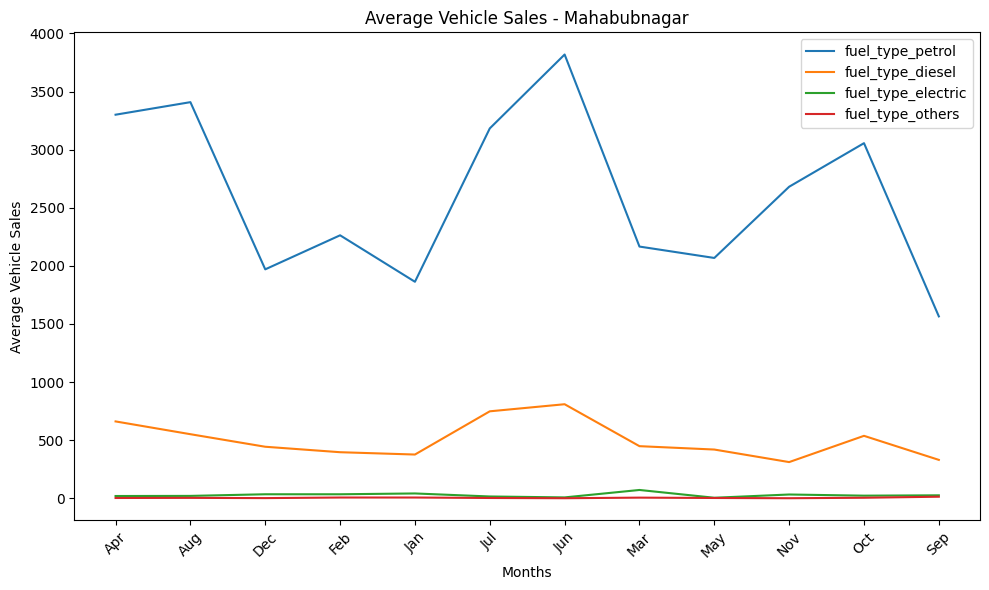

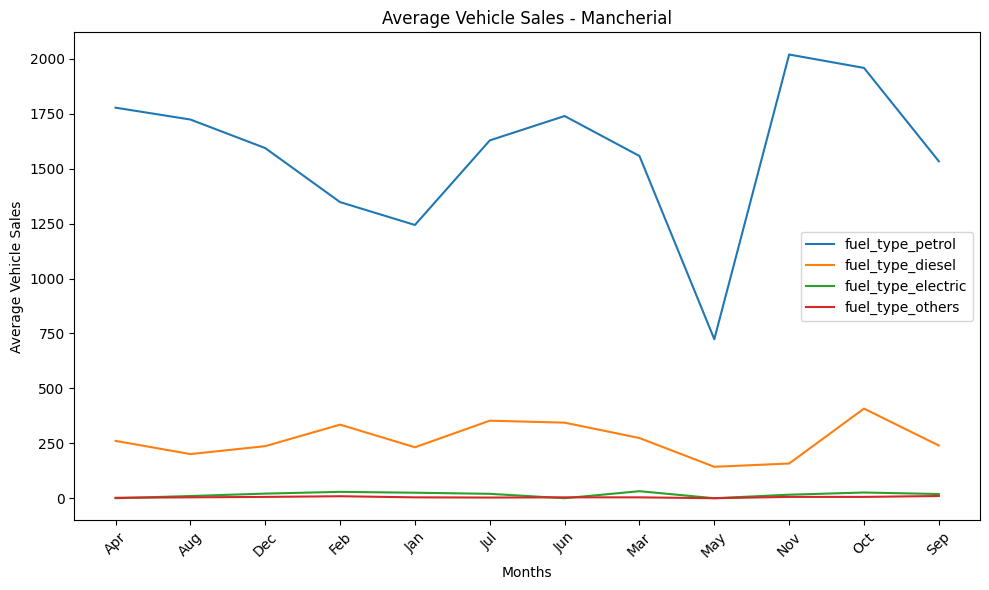

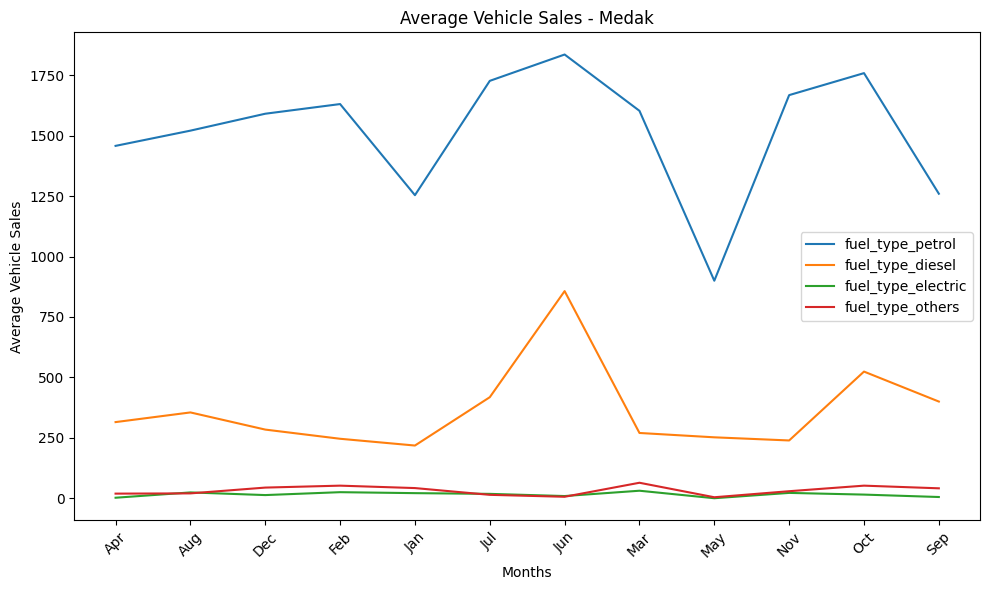

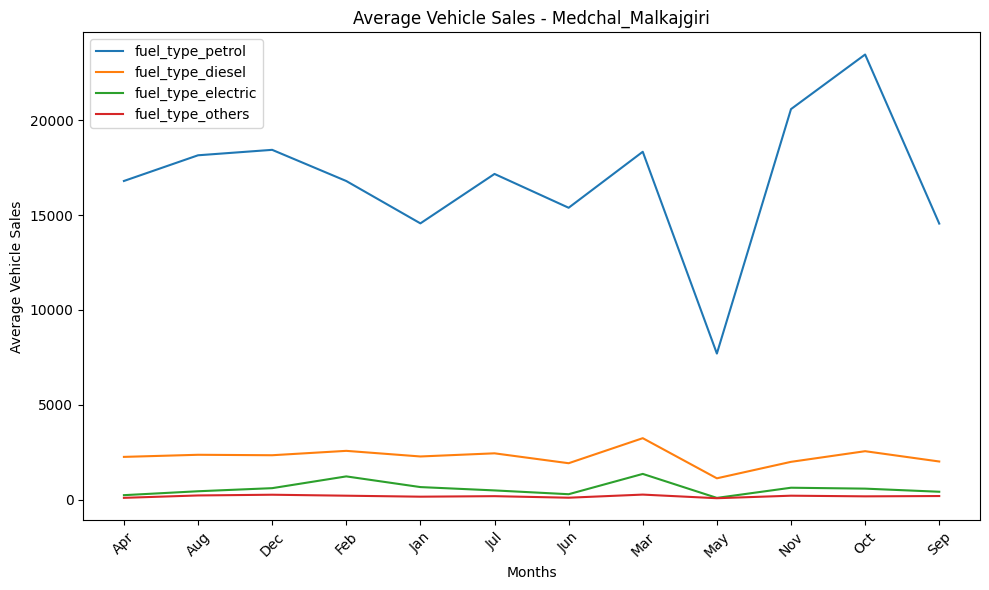

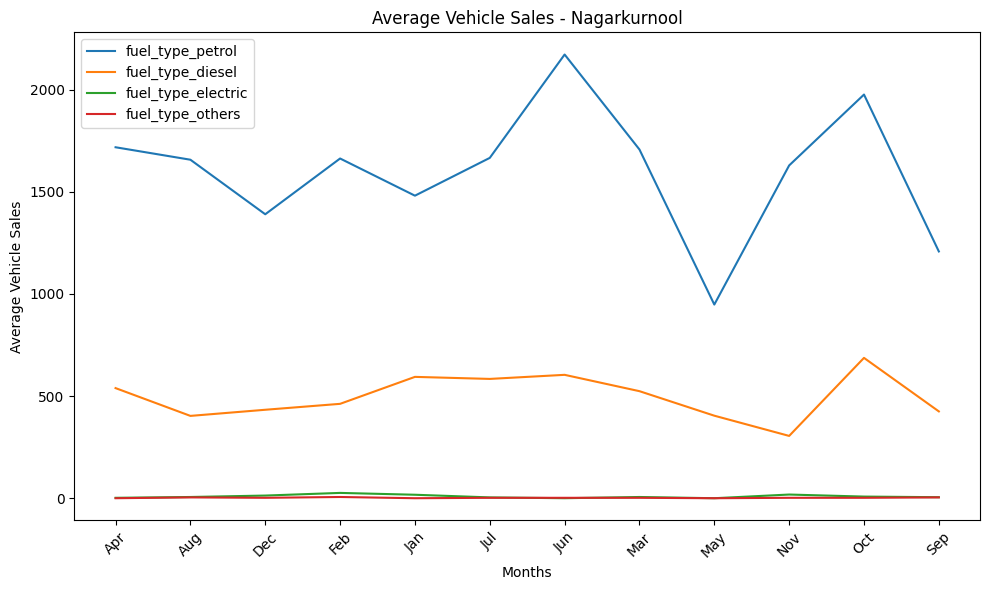

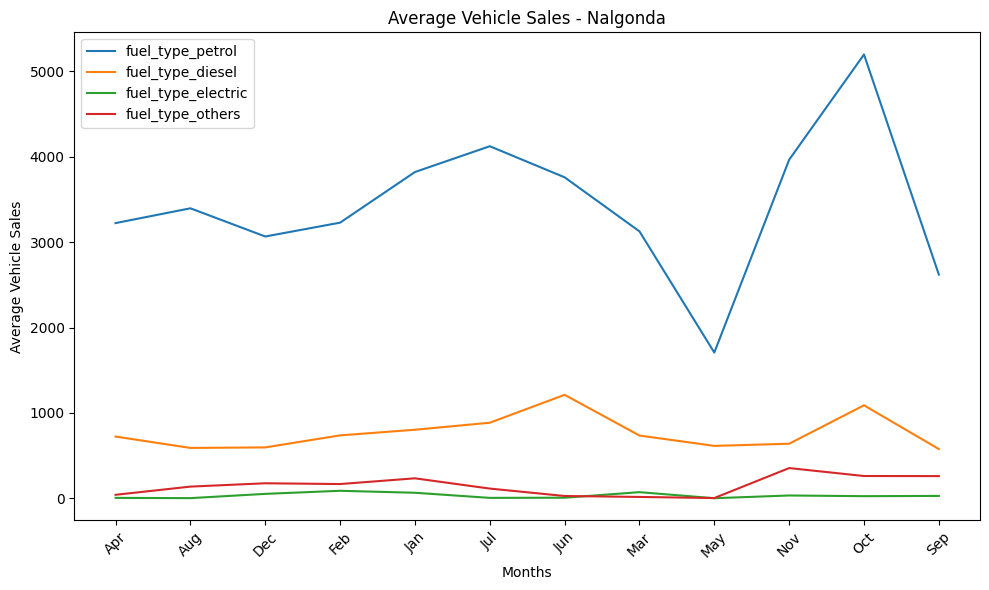

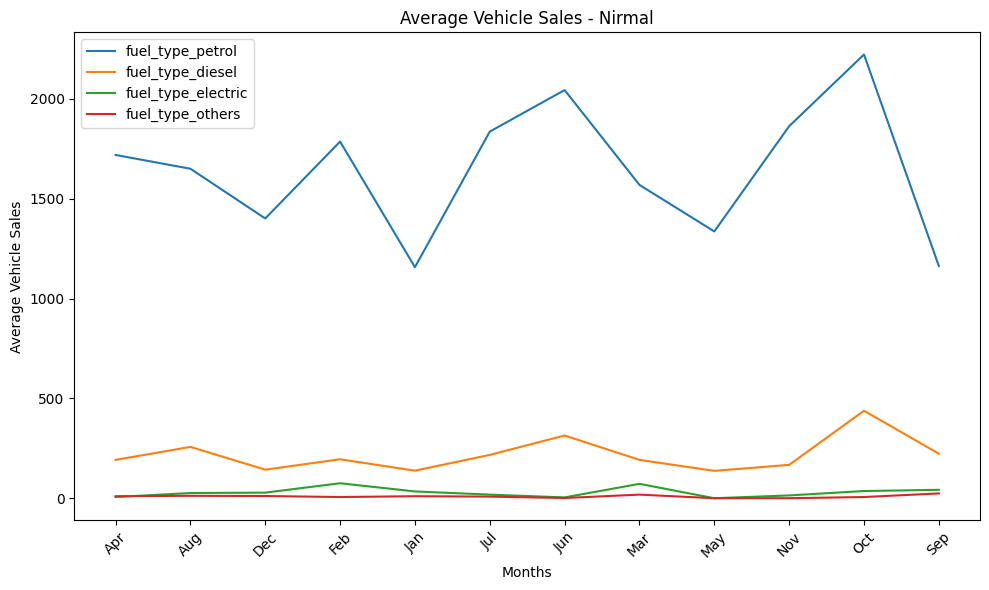

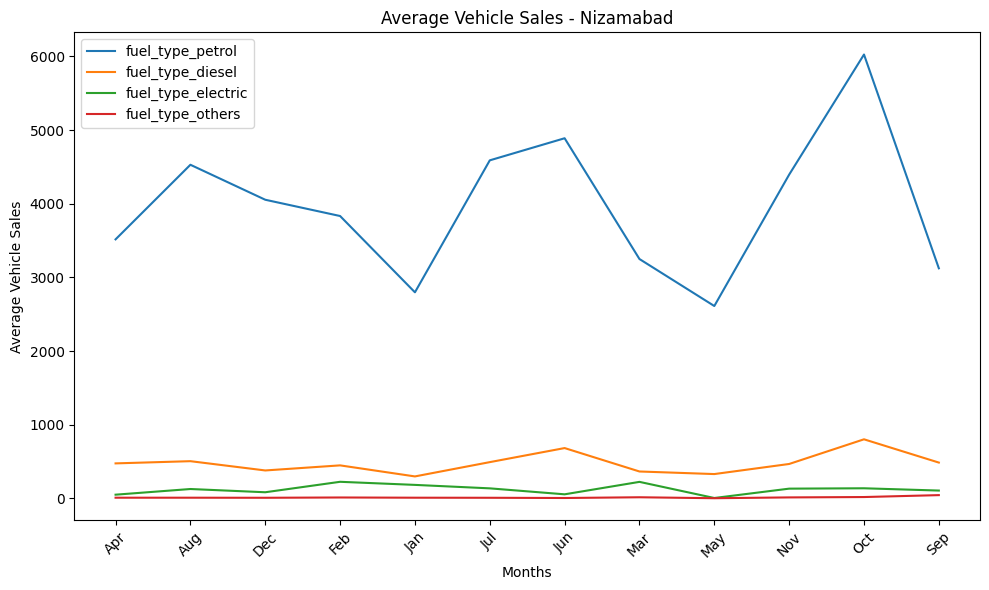

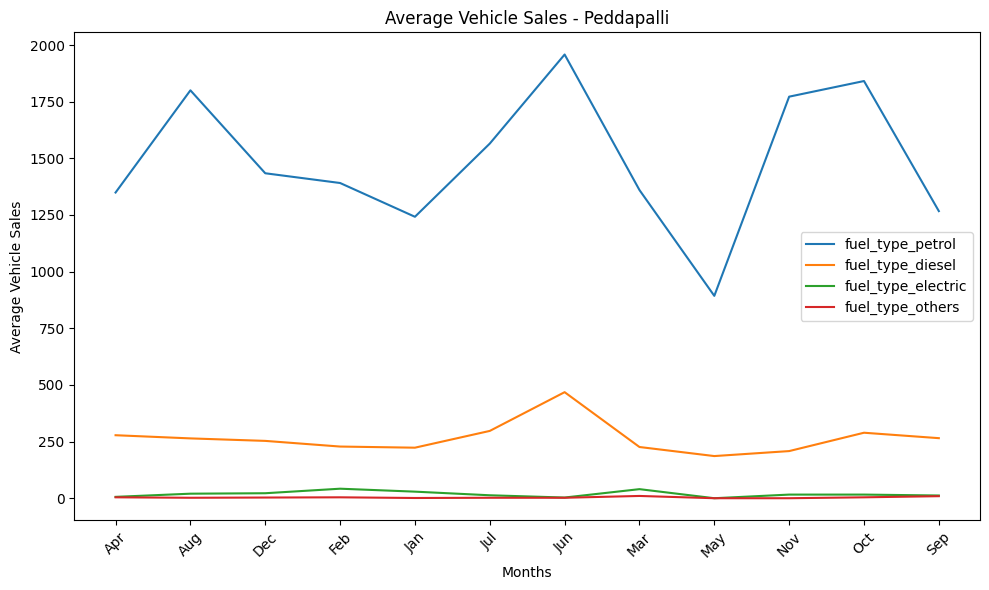

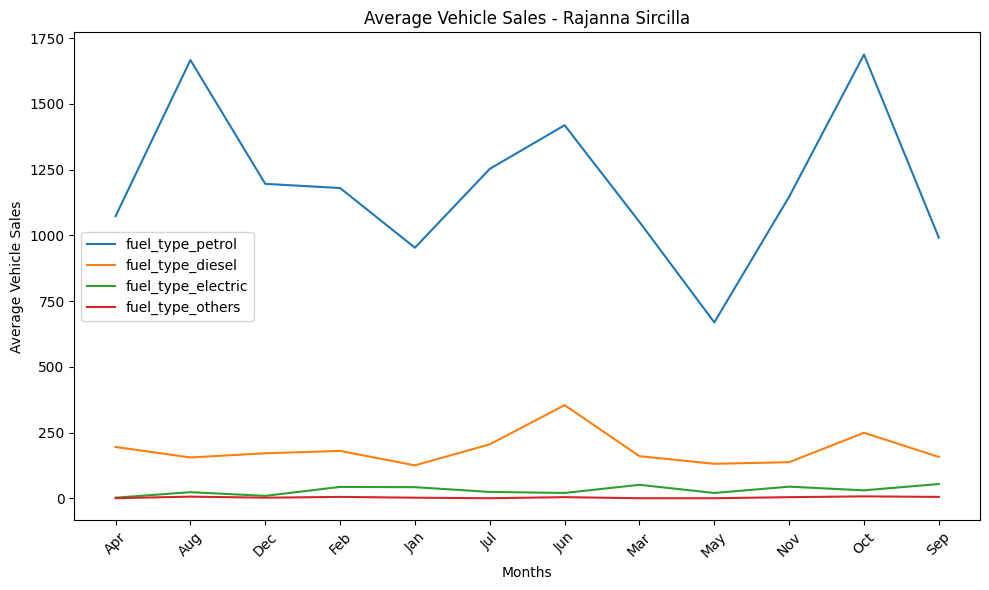

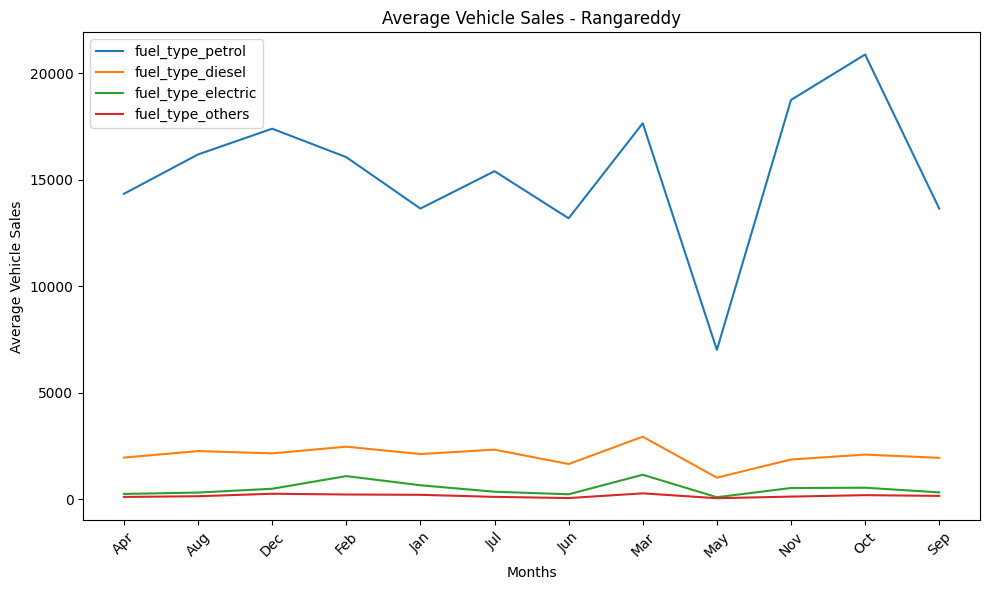

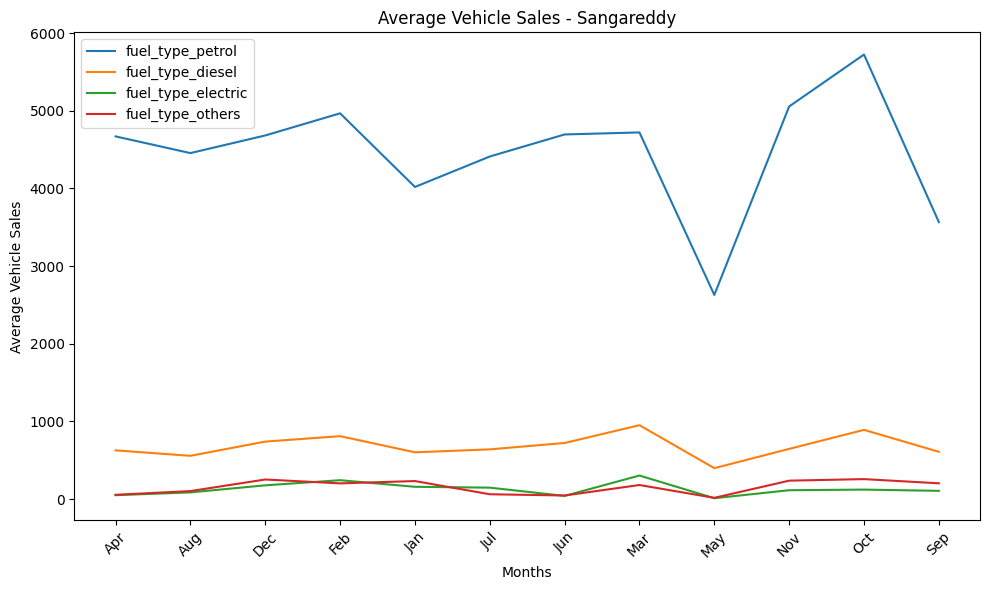

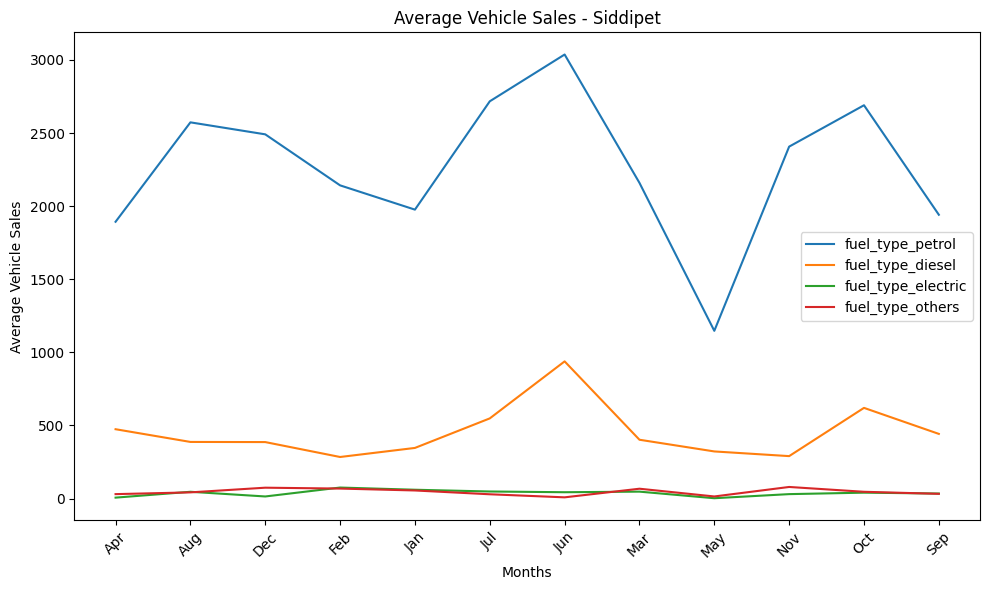

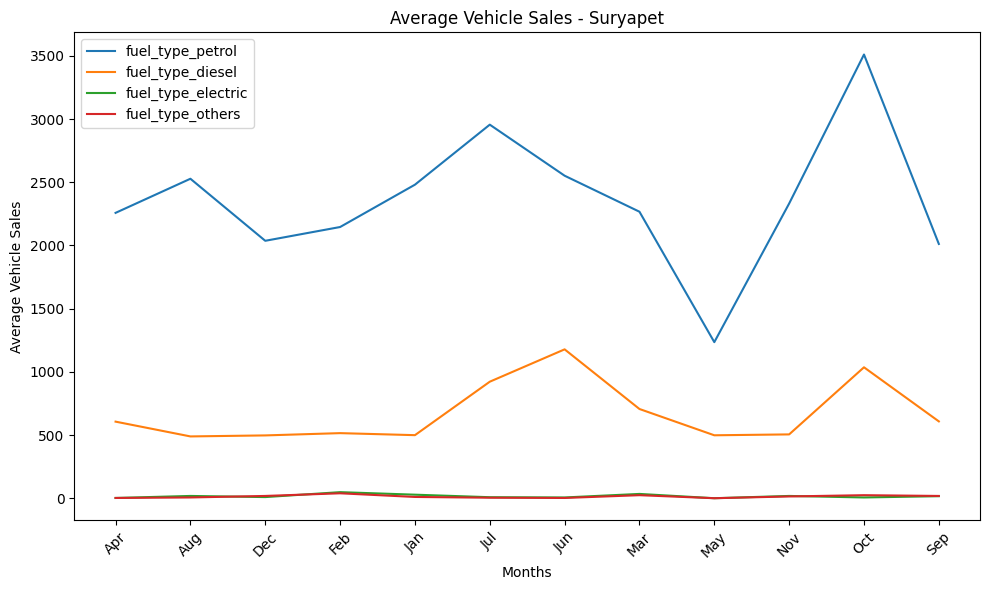

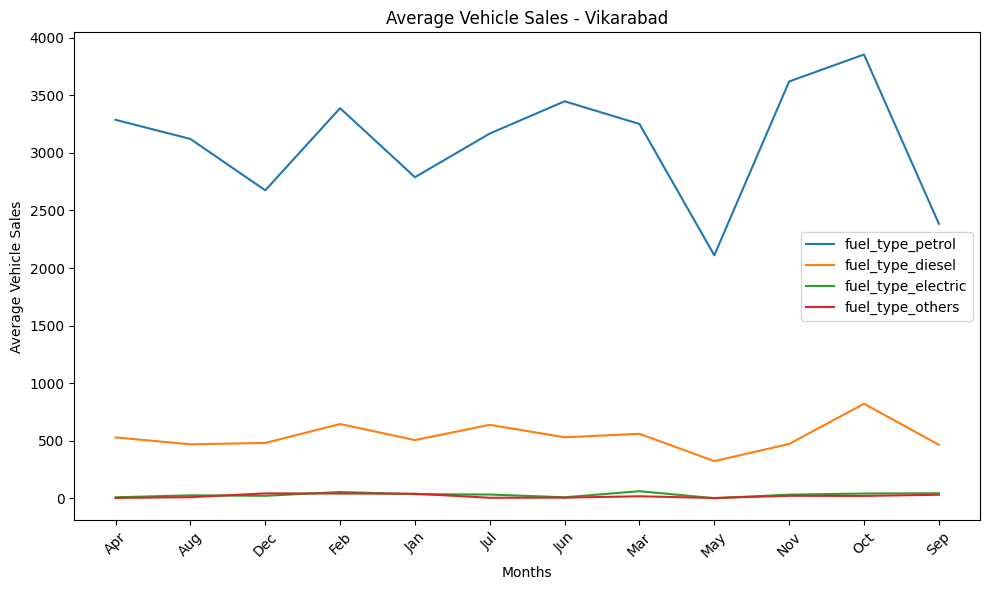

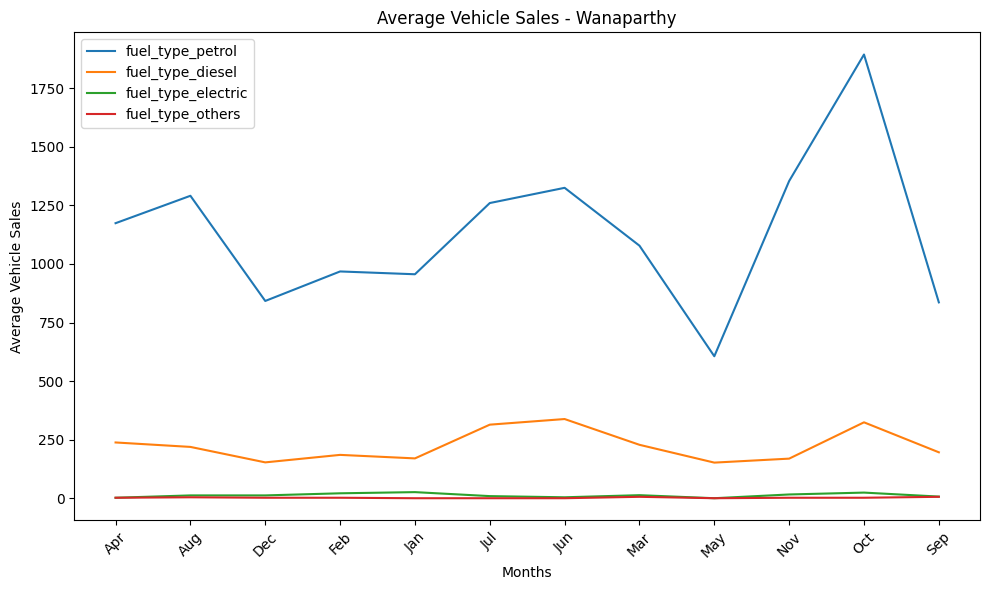

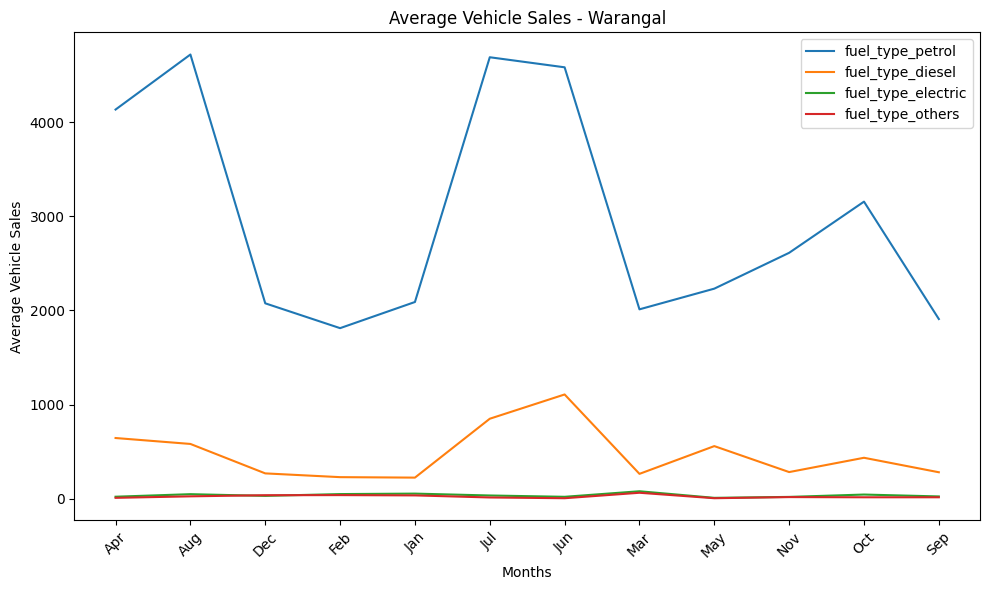

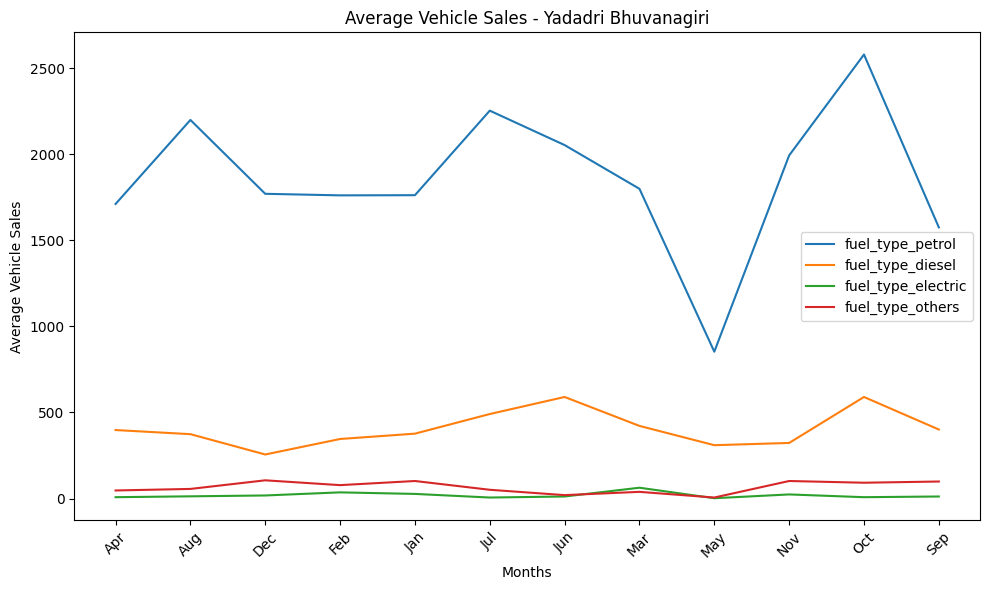

In [46]:
start_date_2021 = '2021-04-01'
end_date_2022 = '2022-03-31'

# Filter dim_date_df for the specified date range
filtered_dim_date_df = df3[(df3['month'] >= start_date_2021) & (df3['month'] <= end_date_2022)]

merged_data = pd.merge(df, filtered_dim_date_df, on='month', how='inner')

# Filter data by Fuel-Type category
fuel_type_columns = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']
fuel_type_data = merged_data[fuel_type_columns + ['dist_code', 'Mmm']]

# Rename district codes with district names
fuel_type_data = pd.merge(fuel_type_data, df1, on='dist_code', how='left')

# Group and calculate average vehicle sales per month for each fuel type, district, and month
avg_vehicle_sales = fuel_type_data.groupby(['district', 'Mmm']).mean().reset_index()

# Generate separate plots for each district
for district in avg_vehicle_sales['district'].unique():
    district_data = avg_vehicle_sales[avg_vehicle_sales['district'] == district]

    plt.figure(figsize=(10, 6))
    for fuel_type in fuel_type_columns:
        plt.plot(district_data['Mmm'], district_data[fuel_type], label=fuel_type)

    plt.title(f"Average Vehicle Sales - {district}")
    plt.xlabel("Months")
    plt.ylabel("Average Vehicle Sales")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

Question 6


<Figure size 1200x600 with 0 Axes>

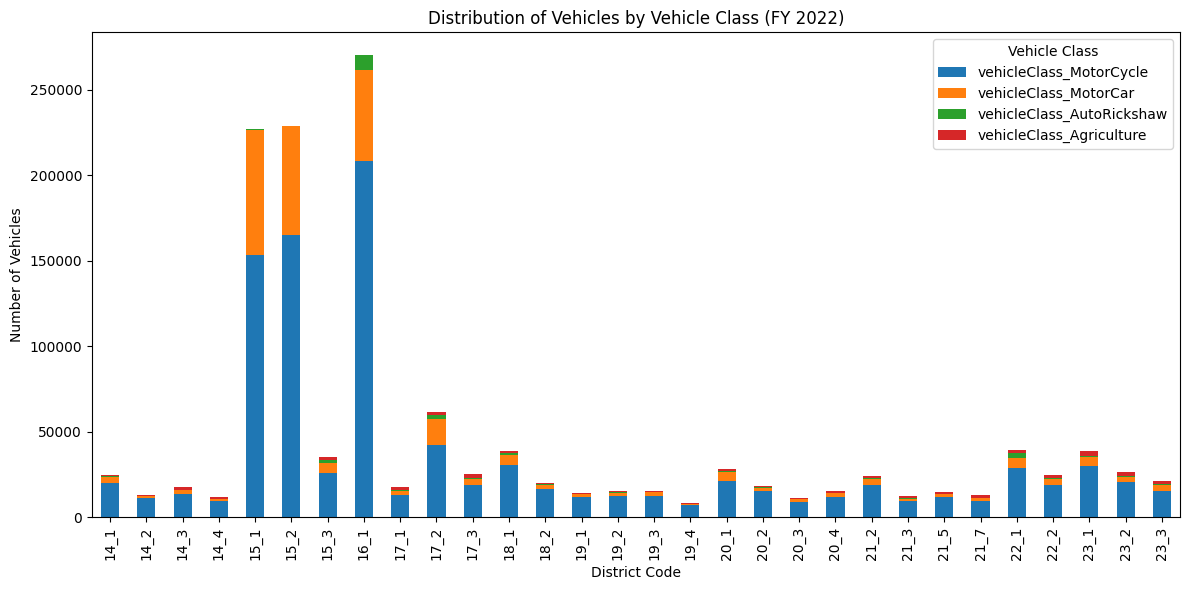

In [22]:
fy_2022_data = df[df['month'].dt.year == 2022]

# Select relevant columns for analysis
vehicle_class_columns = ['dist_code', 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture']

# Group data by district and sum up the vehicle classes
vehicle_class_distribution = fy_2022_data[vehicle_class_columns].groupby('dist_code').sum().reset_index()

# Plot the distribution of vehicles by vehicle class as a stacked bar graph
plt.figure(figsize=(12, 6))
vehicle_class_distribution.plot(x='dist_code', kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('District Code')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicles by Vehicle Class (FY 2022)')
plt.xticks(rotation=90)
plt.legend(title='Vehicle Class')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

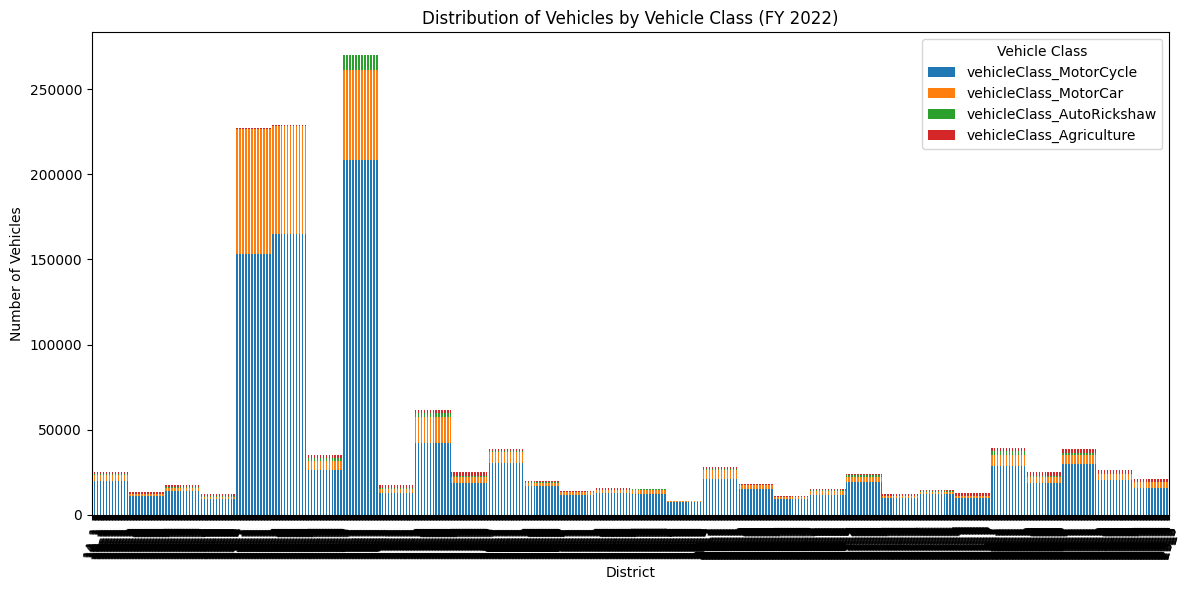

In [26]:
# Select relevant columns for analysis
vehicle_class_columns = ['dist_code', 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture']

# Group data by district and sum up the vehicle classes
vehicle_class_distribution = fy_2022_data[vehicle_class_columns].groupby('dist_code').sum().reset_index()

# Merge with dim_districts_df to get district names
vehicle_class_distribution = pd.merge(vehicle_class_distribution, df['dist_code'], on='dist_code')

# Plot the distribution of vehicles by vehicle class as a stacked bar graph
plt.figure(figsize=(12, 6))
vehicle_class_distribution.plot(x='dist_code', kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('District')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicles by Vehicle Class (FY 2022)')
plt.xticks(rotation=75)
plt.legend(title='Vehicle Class')
plt.tight_layout()
plt.show()

7th question

In [28]:
merged_df = df.merge(df['dist_code'], on='dist_code', how='left', suffixes=('_fact', '_dim'))

# Convert the 'month' column to datetime format
merged_df['month'] = pd.to_datetime(merged_df['month'])

# Filter data for FY 2021 (April 1, 2021 to March 31, 2022)
fy2021_start = pd.to_datetime('2021-04-01')
fy2021_end = pd.to_datetime('2022-03-31')
fy2021_data = merged_df[(merged_df['month'] >= fy2021_start) & (merged_df['month'] <= fy2021_end)]

# Filter data for FY 2022 (April 1, 2022 to March 31, 2023)
fy2022_start = pd.to_datetime('2022-04-01')
fy2022_end = pd.to_datetime('2023-03-31')
fy2022_data = merged_df[(merged_df['month'] >= fy2022_start) & (merged_df['month'] <= fy2022_end)]

# Calculate total vehicle sales for each district and fuel category for FY 2021 and FY 2022
sales_2021 = fy2021_data.groupby('dist_code')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].sum()
sales_2022 = fy2022_data.groupby('dist_code')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].sum()


# Calculate vehicle sales growth for each district and fuel category
vehicle_sales_growth = (sales_2022 - sales_2021)

# Calculate the combined growth across the three fuel categories
vehicle_sales_growth['combined_growth'] = vehicle_sales_growth.sum(axis=1)

# Get the top 3 and bottom 3 districts based on each fuel type
top_petrol = vehicle_sales_growth.nlargest(3, 'fuel_type_petrol')
bottom_petrol = vehicle_sales_growth.nsmallest(3, 'fuel_type_petrol')

top_diesel = vehicle_sales_growth.nlargest(3, 'fuel_type_diesel')
bottom_diesel = vehicle_sales_growth.nsmallest(3, 'fuel_type_diesel')

top_electric = vehicle_sales_growth.nlargest(3, 'fuel_type_electric')
bottom_electric = vehicle_sales_growth.nsmallest(3, 'fuel_type_electric')

# Print the results
print("Top 3 districts with highest sales growth for Petrol:")
print(top_petrol[['fuel_type_petrol']])

print("\nBottom 3 districts with lowest sales growth for Petrol:")
print(bottom_petrol[['fuel_type_petrol']])

print("\nTop 3 districts with highest sales growth for Diesel:")
print(top_diesel[['fuel_type_diesel']])

print("\nBottom 3 districts with lowest sales growth for Diesel:")
print(bottom_diesel[['fuel_type_diesel']])

print("\nTop 3 districts with highest sales growth for Electric:")
print(top_electric[['fuel_type_electric']])

print("\nBottom 3 districts with lowest sales growth for Electric:")
print(bottom_electric[['fuel_type_electric']])

Top 3 districts with highest sales growth for Petrol:
           fuel_type_petrol
dist_code                  
15_1                 772080
16_1                 112752
15_2                 -87648

Bottom 3 districts with lowest sales growth for Petrol:
           fuel_type_petrol
dist_code                  
21_2                -783888
18_1                -782256
14_1                -531360

Top 3 districts with highest sales growth for Diesel:
           fuel_type_diesel
dist_code                  
20_1                 269280
15_1                 150336
17_2                  51936

Bottom 3 districts with lowest sales growth for Diesel:
           fuel_type_diesel
dist_code                  
21_2                -131808
23_1                 -65856
14_1                 -59472

Top 3 districts with highest sales growth for Electric:
           fuel_type_electric
dist_code                    
16_1                   532656
15_1                   369024
15_2                   318240

Bottom 3 